In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [83]:
data = pd.read_csv('data_baru.csv')


In [84]:
data.columns

Index(['tgl/bln/thn', 'suhu ', 'kelembapan (%)', 'curah hujan(mm)',
       'tekanan(kPa)', 'kecepatang angin(m/s)'],
      dtype='object')

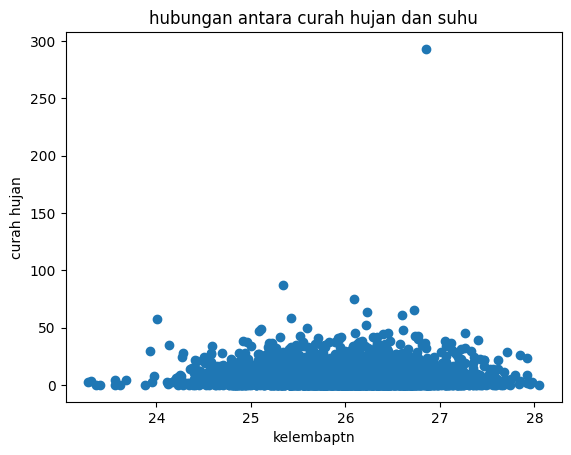

In [85]:
plt.scatter(data['suhu '],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan suhu")
plt.show()



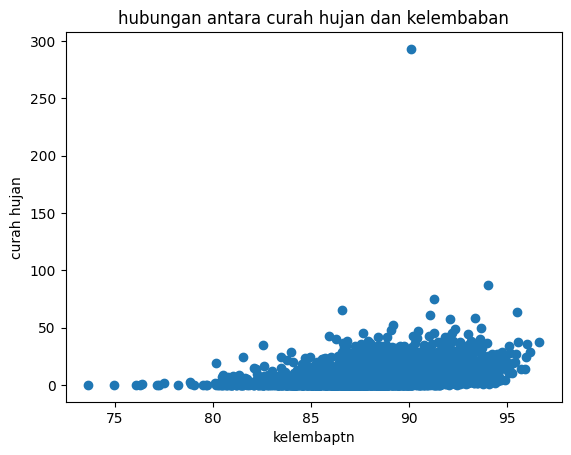

In [86]:
plt.scatter(data[ 'kelembapan (%)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan kelembaban")
plt.show()

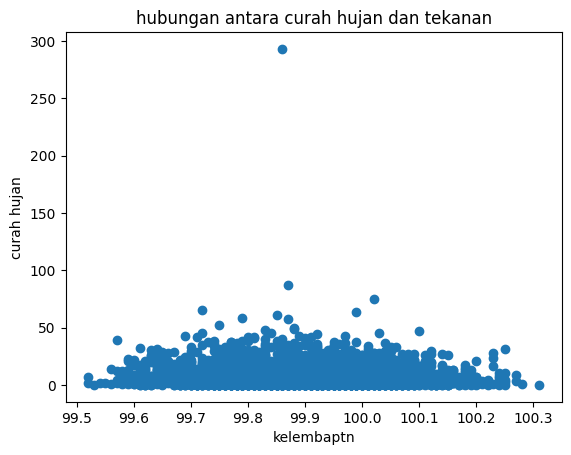

In [87]:
plt.scatter(data[ 'tekanan(kPa)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan tekanan")
plt.show()

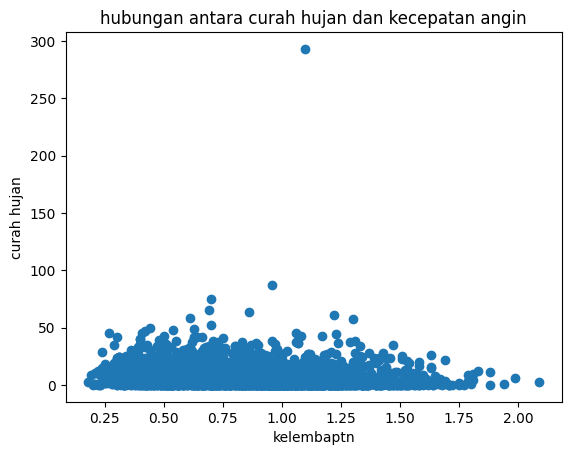

In [88]:
plt.scatter(data[ 'kecepatang angin(m/s)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan kecepatan angin")
plt.show()

In [ ]:
# # 2. Tampilkan sebagian isi data
# print(data.head())
# 3. Ambil fitur dan target
X = data[['kelembapan (%)', 'suhu ']].values
Y = data['curah hujan(mm)'].values.reshape(-1, 1)
# 4. Normalisasi ke 0-1
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_norm = scaler_X.fit_transform(X)
Y_norm = scaler_Y.fit_transform(Y)
# 5. Split data latih dan uji (70:30)
N = X_norm.shape[0]
idx_train = int(0.7 * N)
X_train = X_norm[:idx_train]
Y_train = Y_norm[:idx_train]
X_test = X_norm[idx_train:]


Y_test = Y_norm[idx_train:]
# 6. Membuat dan melatih JST
model = Sequential([
 Dense(2, input_dim=2, activation='sigmoid'),
 Dense(1000, activation='sigmoid'), # hidden layer
 Dense(1, activation='sigmoid') # output layer
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=100, verbose=2)
# 7. Prediksi
Y_pred = model.predict(X_test)
# 8. Visualisasi hasil

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Konversi test dan prediksi ke array numerik
actual = np.array(Y_test)
predicted = np.array(Y_pred)
# MAE
mae_value = mean_absolute_error(actual, predicted)

In [ ]:
# MSE
mse_value = mean_squared_error(actual, predicted)
# RMSE
rmse_value = np.sqrt(mse_value)
# MAPE
mape_value = np.mean(np.abs((actual - predicted) / actual)) * 100
# Tampilkan hasil evaluasi
print(f"MAE : {mae_value:.4f}")
print(f"MSE : {mse_value:.4f}")
print(f"RMSE : {rmse_value:.4f}")


MAE : 0.0196
MSE : 0.0009
RMSE : 0.0292


C:\Users\USER\AppData\Local\Temp\ipykernel_6828\1735318938.py:6: RuntimeWarning: divide by zero encountered in divide
  mape_value = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
eror=actual-predicted
print(eror)

[[-1.51748065e-02]
 [-1.72531111e-02]
 [-6.91283157e-03]
 [-9.81364641e-03]
 [-1.42947724e-02]
 [-1.34559898e-02]
 [ 1.80016625e-02]
 [-5.76231452e-03]
 [ 3.21240826e-02]
 [-9.84209213e-03]
 [ 2.81381086e-03]
 [-6.63453757e-04]
 [-2.08888894e-02]
 [-5.08439116e-03]
 [ 6.00700939e-02]
 [ 2.64349442e-02]
 [ 2.59567256e-02]
 [ 6.56728374e-03]
 [-3.41078160e-03]
 [ 2.61218366e-03]
 [ 3.60367039e-02]
 [ 1.03117983e-02]
 [-1.85012752e-02]
 [ 3.06264805e-02]
 [-1.57889663e-02]
 [-2.48686823e-02]
 [-2.63686499e-02]
 [-2.88402928e-02]
 [-1.32882478e-02]
 [-1.60777086e-02]
 [-1.38357250e-02]
 [-2.66261400e-02]
 [-1.24550279e-02]
 [-1.40191685e-02]
 [ 9.91235612e-02]
 [ 6.56480896e-03]
 [-2.89955688e-03]
 [-1.78917167e-02]
 [-1.82275242e-02]
 [-1.10980419e-02]
 [-4.94984069e-03]
 [-2.50666703e-02]
 [-1.86691489e-02]
 [-1.00275996e-02]
 [-1.12493990e-02]
 [-4.13211879e-03]
 [-2.37046372e-02]
 [-1.81213329e-02]
 [-1.98541023e-02]
 [-1.89292871e-02]
 [-3.22649788e-02]
 [-3.64854093e-02]
 [ 4.5985218

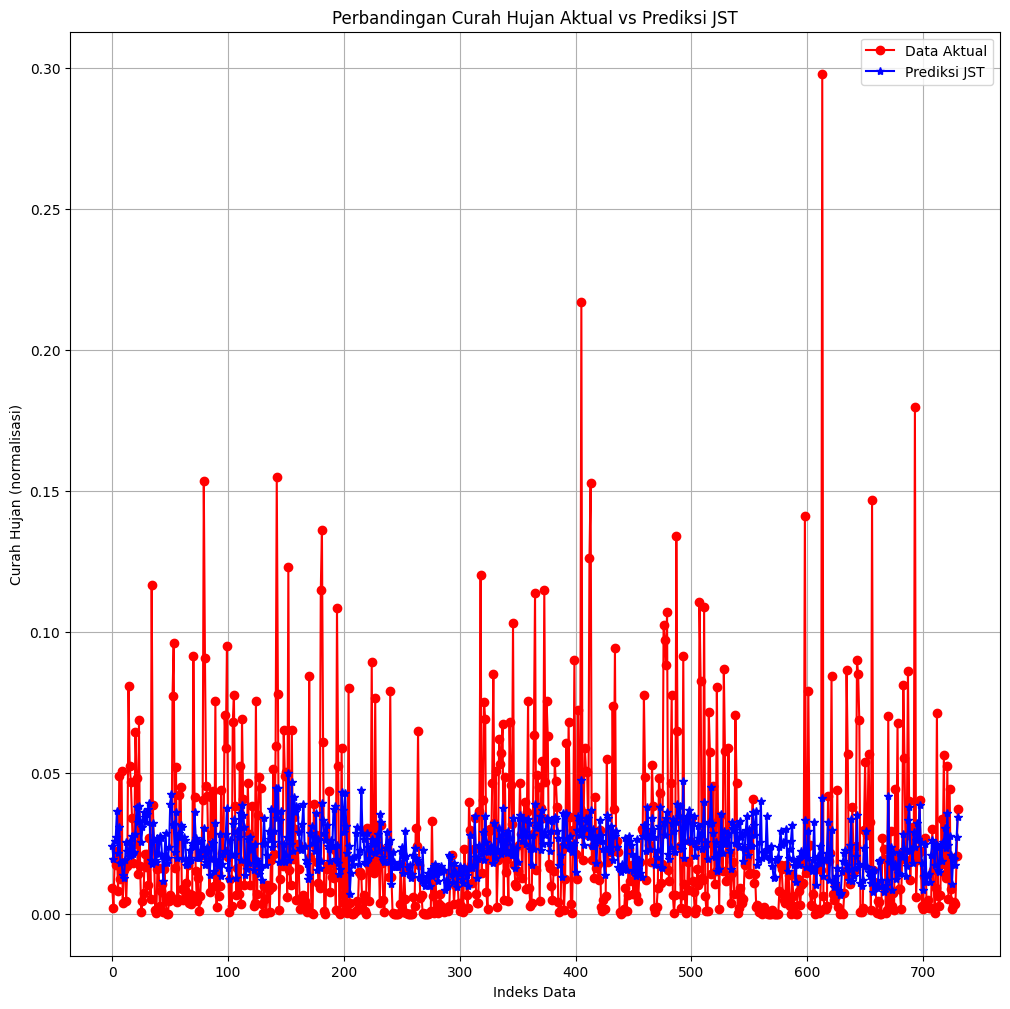

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(Y_test, 'r-o', label='Data Aktual')
plt.plot(Y_pred, 'b-*', label='Prediksi JST')
plt.legend()
plt.xlabel('Indeks Data')
plt.ylabel('Curah Hujan (normalisasi)')
plt.title('Perbandingan Curah Hujan Aktual vs Prediksi JST')
plt.grid(True)
plt.show()

In [ ]:


# 3. Hilangkan spasi pada nama kolom
data.columns = data.columns.str.strip()

# 4. Ubah semua kolom ke numerik (jika perlu)
data = data.apply(pd.to_numeric, errors='coerce')

# 5. Hitung korelasi
korelasi = data.corr()

# 6. Cetak korelasi
print(korelasi)

                           suhu  kelembapan (%)  curah hujan(mm)  \
suhu                   1.000000       -0.395504        -0.042295   
kelembapan (%)        -0.395504        1.000000         0.316899   
curah hujan(mm)       -0.042295        0.316899         1.000000   
tekanan(kPa)          -0.250189       -0.046529        -0.047427   
kecepatang angin(m/s) -0.295277        0.112480        -0.102845   

                       tekanan(kPa)  kecepatang angin(m/s)  
suhu                      -0.250189              -0.295277  
kelembapan (%)            -0.046529               0.112480  
curah hujan(mm)           -0.047427              -0.102845  
tekanan(kPa)               1.000000               0.125841  
kecepatang angin(m/s)      0.125841               1.000000  


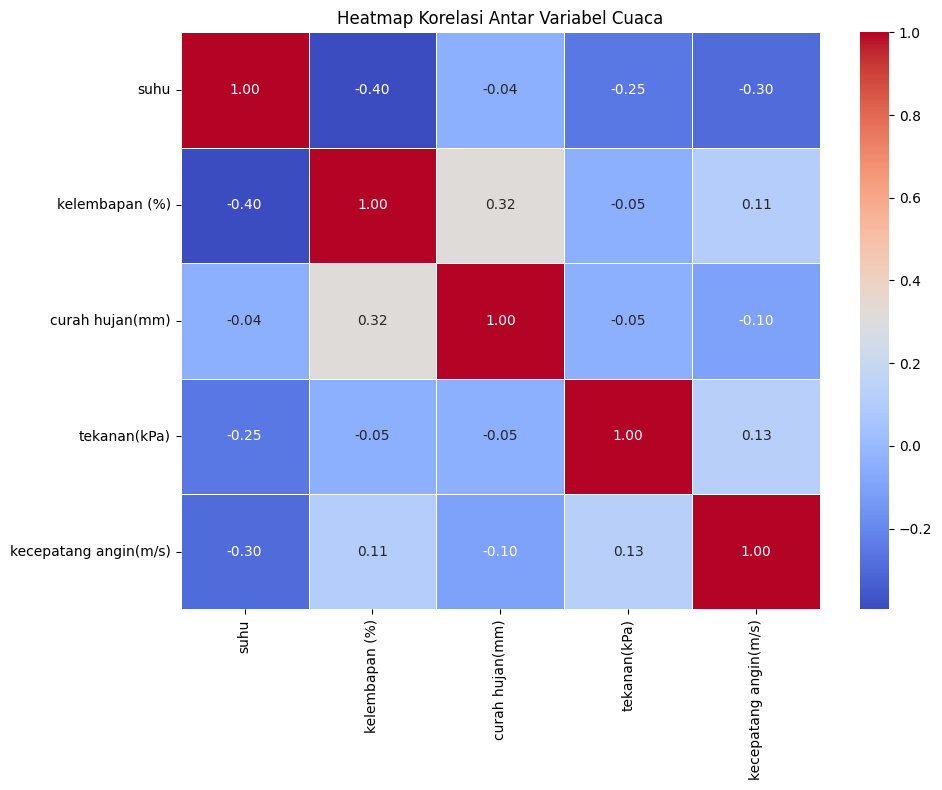

In [ ]:
# Hitung matriks korelasi
corr_matrix = data.corr()

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Cuaca')
plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,suhu,kelembapan (%),curah hujan(mm),tekanan(kPa),kecepatang angin(m/s)
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,26.073138,88.505854,6.872133,99.886265,0.827982
std,0.684244,2.921904,9.565441,0.125080,0.318644
min,23.280000,73.640000,0.000000,99.520000,0.180000
25%,25.620000,86.740000,1.050000,99.800000,0.580000
50%,26.090000,88.625000,3.950000,99.880000,0.800000
75%,26.550000,90.510000,9.340000,99.970000,1.050000
max,28.050000,96.630000,293.220000,100.310000,2.090000
